## **Importing the neccesary Libraries**

In [1]:
import sys

!pip install ydata-profiling                                         #Installs the ydata-profiling package, which is used for generating detailed data profiles.
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib                                              #Installs matplotlib for plotting.
!pip install graphviz

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 9.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=8a1ed1b74dbc87cec34d36c9737911b308e6c6747bb1c7cbb0cb7cdc4e236300
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

# **Import Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bbc-news-data.csv to bbc-news-data.csv


In [3]:
import pandas as pd                   #Imports the pandas library as pd
import numpy as np                    #Imports the numpy library for numerical computing

data_file="bbc-news-data.csv"

data = pd.read_csv(data_file,sep='\t')     ## Load the CSV file into a DataFrame

In [ ]:
data.head(10)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   filename  2225 non-null   object
 2   title     2225 non-null   object
 3   content   2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


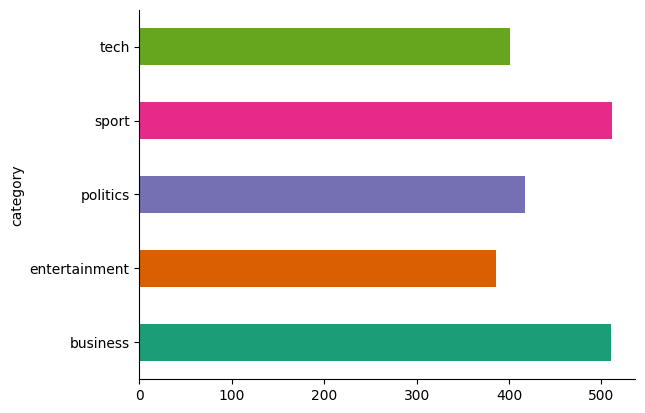

In [ ]:


# @title category

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Text cleaning/Stop Words Removal**

**Text Cleaning without stemming/stop word removal**

In [4]:
#import re                            #Import module for regular expressions

# Text cleaning function
#def clean_text(text):
#   text = re.sub(r'\s+', ' ', text)  # to remove extra spaces, newlines, and tabs.
#   text = re.sub(r'\W', ' ', text)   # to replace all non-word characters with a space.
#  return text.strip().lower()       # to remove any leading and trailing whitespace from the text and Converts the text to lowercase.

### **Text Cleaning using stemming/stop word removal**

In [5]:
# Text cleaning function
def clean_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    #text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    return text


# Clean the content
data['cleaned_content'] = data['content'].apply(clean_text)

# **TFIDF Vectorization**

**Max Features in Content(text) Column** Unigram

In [6]:
# Extract the content column
content = data['content']

# Use CountVectorizer to count unique terms
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(content)

# Get the number of unique terms
num_unique_terms = len(vectorizer.get_feature_names_out())

print(f'Number of unique terms (Unigrams): {num_unique_terms}')

Number of unique terms (Unigrams): 28980


In [7]:
# Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['cleaned_content'])
y = data['category']

# **Splitting data into Train-test subset**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Check the distribution of the categories in the test set
print("Category distribution in test set:")
print(y_test.value_counts())

Category distribution in test set:
category
business         142
sport            122
tech             104
politics          95
entertainment     94
Name: count, dtype: int64


# **Model Training and Evaluation**

In [10]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
import seaborn as sns

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=y_test.unique())
    cm = confusion_matrix(y_test, y_pred, labels=y_test.unique())
    return accuracy, report, cm, y_pred

# Calculate and print TP, FP, FN, TN
def calculate_metrics(cm):
    for i in range(len(cm)):
        tp = cm[i, i]
        fp = cm[:, i].sum() - tp
        fn = cm[i, :].sum() - tp
        tn = cm.sum() - (tp + fp + fn)
        print(f'Class {i}: TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}')

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix')
    plt.show()

# Cross-validation
def cross_validate_model(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, cv=cv)
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}")

## **Naive Bayes**

In [12]:
nb_model = MultinomialNB()
nb_accuracy, nb_report, nb_cm, nb_y_pred = train_and_evaluate_model(
    nb_model, X_train, y_train, X_test, y_test)

**Evaluation_nb**

In [13]:
# Print results
print("Naive Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Classification Report:\n", nb_report)

Naive Bayes Classifier:
Accuracy: 0.9658886894075404
Classification Report:
                precision    recall  f1-score   support

     business       0.96      0.95      0.95       142
        sport       0.99      0.95      0.97        94
     politics       0.92      0.97      0.94        95
entertainment       1.00      0.99      1.00       122
         tech       0.96      0.97      0.97       104

     accuracy                           0.97       557
    macro avg       0.97      0.97      0.97       557
 weighted avg       0.97      0.97      0.97       557



In [14]:

print("\nMetrics per Class:")
calculate_metrics(nb_cm)


Metrics per Class:
Class 0: TP: 135, FP: 6, TN: 409, FN: 7
Class 1: TP: 121, FP: 0, TN: 435, FN: 1
Class 2: TP: 92, FP: 8, TN: 454, FN: 3
Class 3: TP: 89, FP: 1, TN: 462, FN: 5
Class 4: TP: 101, FP: 4, TN: 449, FN: 3


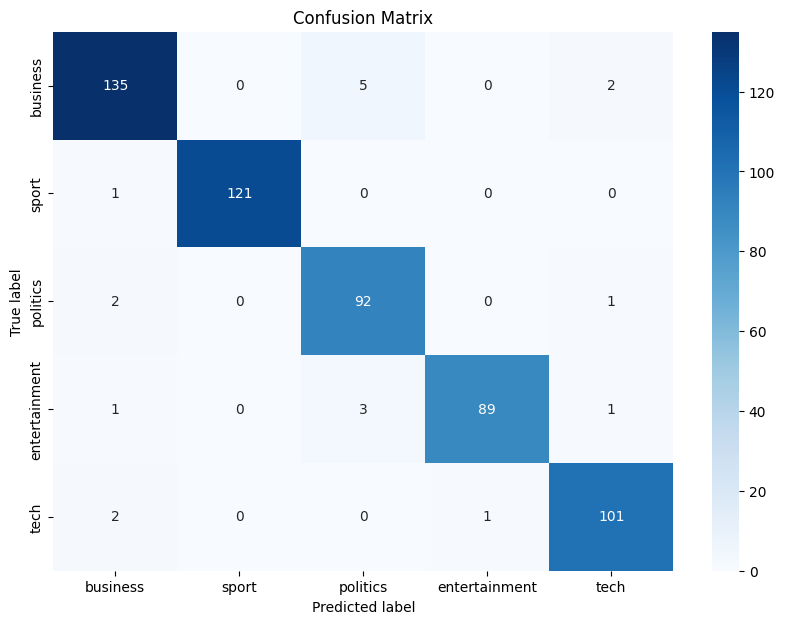

In [15]:
# Plot the confusion matrix
plot_confusion_matrix(nb_cm, classes=y_test.unique())

**Cross Validation_nb**

In [16]:
print("Naive Bayes Classifier (Cross-Validation):")
cross_validate_model(nb_model, X, y)

Naive Bayes Classifier (Cross-Validation):
Cross-Validation Scores: [0.96179775 0.95730337 0.93932584 0.98202247 0.98202247]
Mean Accuracy: 0.964494382022472
Standard Deviation: 0.016167286066161763


## **Decision Tree**

In [17]:
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

In [18]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_accuracy, dt_report, dt_cm, dt_y_pred = train_and_evaluate_model(
    dt_model, X_train, y_train, X_test, y_test)

**Evaluation_dt**

In [19]:
print("Decision Tree Classifier:")
print("Accuracy:", dt_accuracy)
print("Classification Report:\n", dt_report)

Decision Tree Classifier:
Accuracy: 0.8527827648114902
Classification Report:
                precision    recall  f1-score   support

     business       0.79      0.81      0.80       142
        sport       0.86      0.79      0.82        94
     politics       0.86      0.82      0.84        95
entertainment       0.90      0.97      0.93       122
         tech       0.87      0.87      0.87       104

     accuracy                           0.85       557
    macro avg       0.86      0.85      0.85       557
 weighted avg       0.85      0.85      0.85       557



In [ ]:
print("\nMetrics per Class:")
calculate_metrics(dt_cm)


Metrics per Class:
Class 0: TP: 83, FP: 24, TN: 363, FN: 13
Class 1: TP: 70, FP: 12, TN: 374, FN: 27
Class 2: TP: 73, FP: 22, TN: 364, FN: 24
Class 3: TP: 86, FP: 15, TN: 371, FN: 11
Class 4: TP: 80, FP: 18, TN: 369, FN: 16


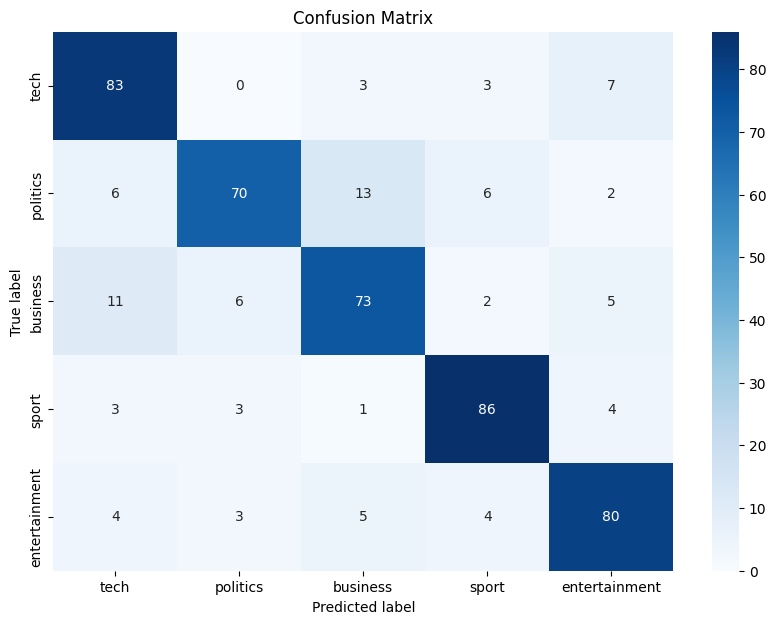

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(dt_cm, classes=y_test.unique())

**Cross Validation_dt**

In [ ]:
print("Decision Tree Classifier (Cross-Validation):")
cross_validate_model(dt_model, X, y)

Decision Tree Classifier (Cross-Validation):
Cross-Validation Scores: [0.85492228 0.77979275 0.82901554 0.84974093 0.85751295]
Mean Accuracy: 0.8341968911917098
Standard Deviation: 0.028987773535128235


## **Random Forest**

In [20]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_accuracy, rf_report, rf_cm, rf_y_pred = train_and_evaluate_model(
    rf_model, X_train, y_train, X_test, y_test)

**Evaluation-rf**

In [21]:
print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)

Random Forest Classifier:
Accuracy: 0.9551166965888689
Classification Report:
                precision    recall  f1-score   support

     business       0.94      0.95      0.95       142
        sport       0.99      0.94      0.96        94
     politics       0.93      0.94      0.93        95
entertainment       0.96      0.98      0.97       122
         tech       0.96      0.96      0.96       104

     accuracy                           0.96       557
    macro avg       0.96      0.95      0.95       557
 weighted avg       0.96      0.96      0.96       557



In [ ]:
print("\nMetrics per Class:")
calculate_metrics(rf_cm)


Metrics per Class:
Class 0: TP: 92, FP: 7, TN: 380, FN: 4
Class 1: TP: 91, FP: 3, TN: 383, FN: 6
Class 2: TP: 94, FP: 2, TN: 384, FN: 3
Class 3: TP: 97, FP: 2, TN: 384, FN: 0
Class 4: TP: 91, FP: 4, TN: 383, FN: 5


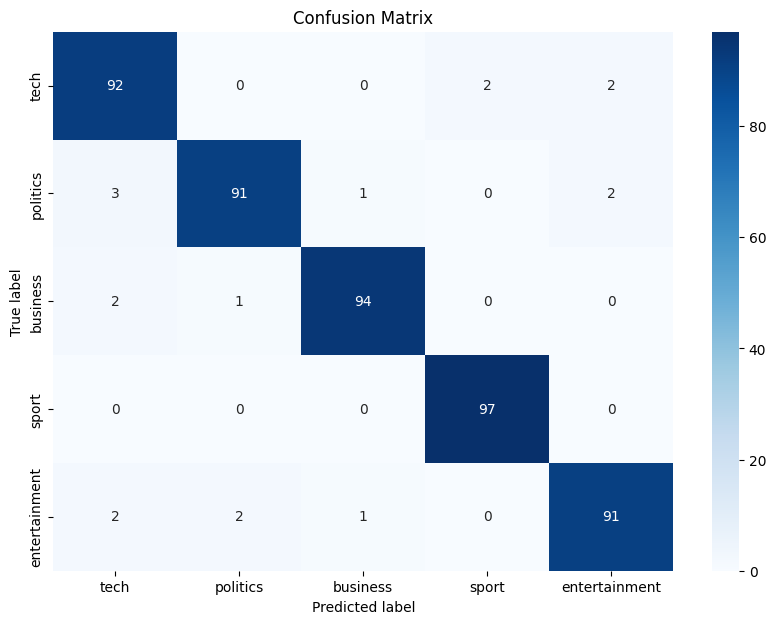

In [ ]:
# Plot the confusion matrix
plot_confusion_matrix(rf_cm, classes=y_test.unique())

**Cross Validation_rf**

In [22]:
print("Random Forest Classifier (Cross-Validation):")
cross_validate_model(rf_model, X, y)


Random Forest Classifier (Cross-Validation):
Cross-Validation Scores: [0.94606742 0.95955056 0.92359551 0.96629213 0.97303371]
Mean Accuracy: 0.9537078651685393
Standard Deviation: 0.01749925603050048


# **Comparison**

Comparison of Model Accuracies and Reports:
           Model  Accuracy                              Classification Report
0    Naive Bayes  0.965889                 precision    recall  f1-score  ...
1  Decision Tree  0.852783                 precision    recall  f1-score  ...
2  Random Forest  0.955117                 precision    recall  f1-score  ...


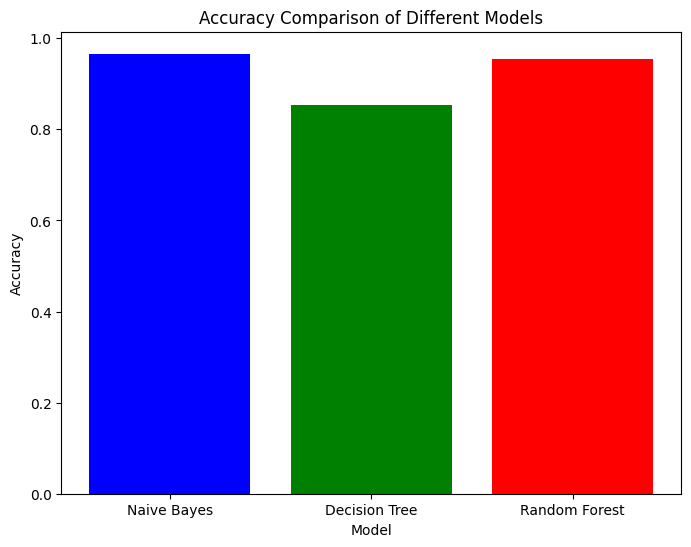

In [23]:
# Store the results in a dictionary
results = {
    "Model": ["Naive Bayes", "Decision Tree", "Random Forest"],
    "Accuracy": [nb_accuracy, dt_accuracy, rf_accuracy],
    "Classification Report": [nb_report, dt_report, rf_report]
}

# Convert the results dictionary to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print("Comparison of Model Accuracies and Reports:")
print(results_df)


# Bar plot for accuracies
plt.figure(figsize=(8, 6))
plt.bar(results_df["Model"], results_df["Accuracy"], color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison of Different Models")
plt.show()
